In [ ]:
# some experiments with different ML models to classify data into three classes: indoor/outdoor/commuting

In [42]:
import pandas as pd
import numpy as np
from os import path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
#import helper_functions_io as hf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, plot_confusion_matrix
import matplotlib.pyplot as plt
bins =['bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8',
       'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15']

In [43]:
graph_path = "./graphs"
data_dir = "./data/indoor_outdoor"
data_path = path.join(data_dir, "new_data_set_with_roads_distance_land.csv")
full_data = pd.read_csv(data_path)
full_data.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,pm1,pm2_5,pm10,temperature,humidity,bin0,bin1,...,file label,i/o,gps_dist,gps_dist_std,geometry,highway,distance,close_road_idx,landuse,close_land_idx
0,0,0,1518035457738,1.245806,1.590959,1.605238,24.700000,23.700000,0.635514,0.177570,...,6,0,0.000000,0.0,POINT (-3.1834331 55.9446894),footway,0.000023,1493.0,building,889.0
1,1,1,1518038866288,0.558534,0.773462,0.949025,24.100000,23.800001,0.617021,0.127660,...,6,0,0.000018,0.0,POINT (-3.1834157 55.94468670000001),footway,0.000018,1493.0,unknown,NaN
2,2,2,1518039131629,0.347164,0.445047,0.461267,24.300001,24.000000,0.718750,0.156250,...,6,0,0.000023,0.0,POINT (-3.1834382 55.94468979999999),footway,0.000024,1493.0,building,889.0
3,3,3,1518041088275,0.466050,0.630702,0.819997,22.700000,25.400000,0.700000,0.125000,...,6,0,0.000041,0.0,POINT (-3.1833971 55.9446894),footway,0.000019,1493.0,unknown,NaN
4,4,4,1518046406113,3.238715,5.534687,13.598838,26.000000,36.500000,0.433213,0.176895,...,6,0,0.000030,0.0,POINT (-3.1833737 55.94470870000001),footway,0.000035,1493.0,building,889.0


In [44]:
full_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'timestamp', 'pm1', 'pm2_5', 'pm10',
       'temperature', 'humidity', 'bin0', 'bin1', 'bin2', 'bin3', 'bin4',
       'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12',
       'bin13', 'bin14', 'bin15', 'gpsLongitude', 'gpsLatitude', 'gpsAccuracy',
       'file label', 'i/o', 'gps_dist', 'gps_dist_std', 'geometry', 'highway',
       'distance', 'close_road_idx', 'landuse', 'close_land_idx'],
      dtype='object')

In [45]:
full_data['gpsAccuracy'].fillna(0, inplace=True)
full_data.drop(columns=['close_road_idx', 'close_land_idx'], inplace=True)

In [46]:
full_data.dropna(axis=0, inplace=True)
np.unique(full_data['i/o'], return_counts=True)

(array([0, 1, 2]), array([2141, 2216, 2411]))

In [47]:
#full_data = full_data[full_data['i/o']!=1]
#full_data.loc[full_data['i/o']==2, 'i/o'] = 1
#np.unique(full_data['i/o'], return_counts=True)

In [48]:
## Get data
full_data['highway'] = full_data['highway'].astype('category')
full_data['highway_encode'] = full_data['highway'].cat.codes
full_data['landuse'] = full_data['landuse'].astype('category')
full_data['landuse_encode'] = full_data['landuse'].cat.codes

chosen_columns1 = ['temperature', 'humidity', 'bin0','bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9','bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'gps_dist']
chosen_columns_air = ['bin0','bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9','bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'gps_dist']
chosen_columns_road = ['pm1', 'pm2_5', 'pm10', 'bin0','bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9','bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'highway_encode', 'gps_dist']
chosen_columns_all = ['temperature', 'humidity','highway_encode', 'distance', 'landuse_encode','bin0','bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9','bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'gps_dist']


X = full_data[chosen_columns1] # include temperature & humidity
X_air = full_data[chosen_columns_air]
X_road = full_data[chosen_columns_road]
X_all = full_data[chosen_columns_all]

X = X.dropna(axis = 0)
X_air = X_air.dropna(axis = 0)
X_road = X_road.dropna(axis = 0)
X_all = X_all.dropna(axis = 0)

y = full_data['i/o']
X_all.head()

,temperature,humidity,highway_encode,distance,landuse_encode,bin0,bin1,bin2,bin3,bin4,...,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,gps_dist
0,24.700000,23.700000,0,0.000023,0,0.635514,0.177570,0.140187,0.028037,0.009346,...,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000
1,24.100000,23.800001,0,0.000018,3,0.617021,0.127660,0.191489,0.042553,0.000000,...,0.021277,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000018
2,24.300001,24.000000,0,0.000024,0,0.718750,0.156250,0.031250,0.031250,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000023
3,22.700000,25.400000,0,0.000019,3,0.700000,0.125000,0.125000,0.000000,0.000000,...,0.025000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000041
4,26.000000,36.500000,0,0.000035,0,0.433213,0.176895,0.173285,0.079422,0.046931,...,0.014440,0.01444,0.00361,0.00361,0.0,0.0,0.0,0.0,0.0,0.000030


In [49]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_air_train, X_air_test, y_air_train, y_air_test = train_test_split(X_air, y, test_size=0.33, random_state=0)
X_road_train, X_road_test, y_road_train, y_road_test = train_test_split(X_road, y, test_size=0.33, random_state=0)
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=0.33, random_state=0)

# Naïve Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

Score: 0.7985675917636527
F1 Score: 0.7973444338221508


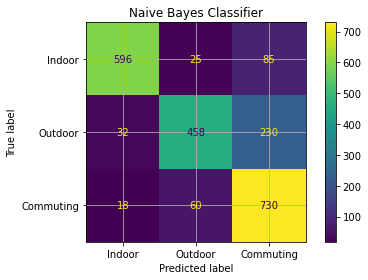

In [51]:
clf = GaussianNB()
#clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
print("Score: {}".format(clf.score(X_test, y_test)))
y_preds = clf.predict(X_test)
print("F1 Score: {}".format(f1_score(y_test, y_preds, average='weighted')))
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Indoor', 'Outdoor', 'Commuting'])
plt.grid(None)
plt.title('Naive Bayes Classifier')
plt.tight_layout()
#plt.savefig(path.join('./ioc_graphs', 'nb_classifier.jpg'))

Score: 0.6418979409131602
F1 Score: 0.643413642611542


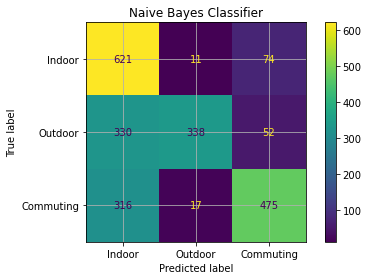

In [23]:
clf = GaussianNB()
clf.fit(X_air_train, y_air_train)
print("Score: {}".format(clf.score(X_air_test, y_air_test)))
y_air_preds = clf.predict(X_air_test)
print("F1 Score: {}".format(f1_score(y_air_test, y_air_preds, average='weighted')))
plot_confusion_matrix(clf, X_air_test, y_air_test, display_labels=['Indoor', 'Outdoor', 'Commuting'])
plt.grid(None)
plt.title('Naive Bayes Classifier')
plt.tight_layout()

Score: 0.6517457475380484
F1 Score: 0.6032204712890433


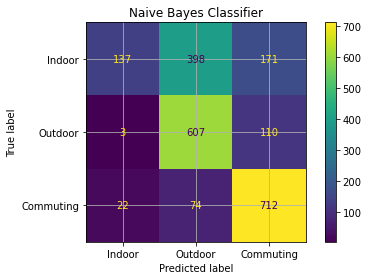

In [24]:
clf = GaussianNB()
clf.fit(X_road_train, y_road_train)
print("Score: {}".format(clf.score(X_road_test, y_road_test)))
y_road_preds = clf.predict(X_road_test)
print("F1 Score: {}".format(f1_score(y_road_test, y_road_preds, average='weighted')))
plot_confusion_matrix(clf, X_road_test, y_road_test, display_labels=['Indoor', 'Outdoor', 'Commuting'])
plt.grid(None)
plt.title('Naive Bayes Classifier')
plt.tight_layout()
#plt.savefig(path.join('./ioc_graphs', 'nb_classifier.jpg'))

Score: 0.8675022381378693
F1 Score: 0.8660476174453466


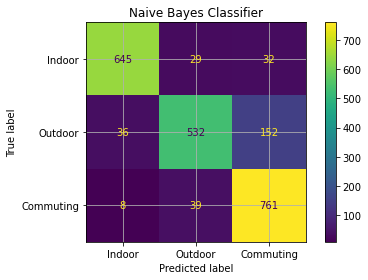

In [25]:
clf = GaussianNB()
clf.fit(X_all_train, y_all_train)
print("Score: {}".format(clf.score(X_all_test, y_all_test)))
y_all_preds = clf.predict(X_all_test)
print("F1 Score: {}".format(f1_score(y_all_test, y_all_preds, average='weighted')))
plot_confusion_matrix(clf, X_all_test, y_all_test, display_labels=['Indoor', 'Outdoor', 'Commuting'])
plt.grid(None)
plt.title('Naive Bayes Classifier')
plt.tight_layout()

# KNN 

Score: 0.9435989256938228
F1 Score: 0.9433833049011271


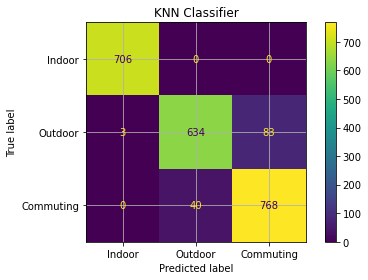

In [54]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Score: {}".format(clf.score(X_test, y_test)))
y_preds = clf.predict(X_test)
print("F1 Score: {}".format(f1_score(y_test, y_preds, average='weighted')))
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Indoor', 'Outdoor', 'Commuting'])
plt.grid(None)
plt.title('KNN Classifier')
plt.tight_layout()

Score: 0.7153088630259624
F1 Score: 0.7143518704387518


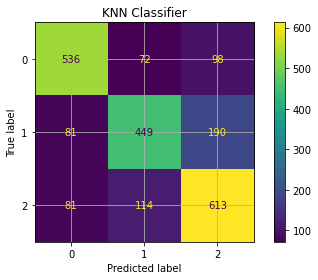

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_air_train, y_air_train)
print("Score: {}".format(knn.score(X_air_test, y_air_test)))
y_air_preds = knn.predict(X_air_test)
print("F1 Score: {}".format(f1_score(y_air_test, y_air_preds, average='weighted')))
plot_confusion_matrix(knn, X_air_test, y_air_test)
plt.grid(None)
plt.title('KNN Classifier')
plt.tight_layout()
#plt.savefig(path.join('./ioc_graphs', 'knn_classifier.jpg'))

Score: 0.8500447627573858
F1 Score: 0.8501138059307082


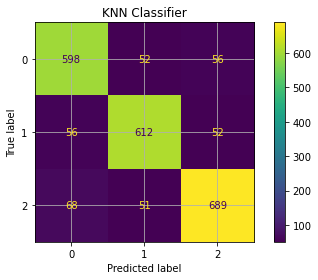

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_road_train, y_road_train)
print("Score: {}".format(knn.score(X_road_test, y_road_test)))
y_road_preds = knn.predict(X_road_test)
print("F1 Score: {}".format(f1_score(y_road_test, y_road_preds, average='weighted')))
plot_confusion_matrix(knn, X_road_test, y_road_test)
plt.grid(None)
plt.title('KNN Classifier')
plt.tight_layout()
#plt.savefig(path.join('./ioc_graphs', 'knn_classifier.jpg'))

Score: 0.9749328558639212
F1 Score: 0.9749024941674246


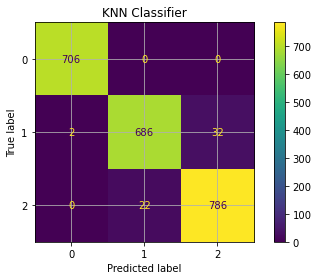

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_all_train, y_all_train)
print("Score: {}".format(knn.score(X_all_test, y_all_test)))
y_all_preds = knn.predict(X_all_test)
print("F1 Score: {}".format(f1_score(y_all_test, y_all_preds, average='weighted')))
plot_confusion_matrix(knn, X_all_test, y_all_test)
plt.grid(None)
plt.title('KNN Classifier')
plt.tight_layout()
#plt.savefig(path.join('./ioc_graphs', 'knn_classifier.jpg'))

# Support Vector Machine

In [55]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [33]:
clf = make_pipeline(StandardScaler(), SVC(gamma='scale'))
clf.fit(X_air_train, y_air_train)
y_air_preds = clf.predict(X_air_test)
print("Score: {}".format(clf.score(X_air_test, y_air_test)))
print("F1 Score: {}".format(f1_score(y_air_test, y_air_preds, average='weighted')))

Score: 0.8576544315129812
F1 Score: 0.8579085523688772


In [34]:
clf = make_pipeline(StandardScaler(), SVC(gamma='scale'))
clf.fit(X_road_train, y_road_train)
y_road_preds = clf.predict(X_road_test)
print("Score: {}".format(clf.score(X_road_test, y_road_test)))
print("F1 Score: {}".format(f1_score(y_road_test, y_road_preds, average='weighted')))

Score: 0.9131602506714414
F1 Score: 0.9135275925757508


In [35]:
clf = make_pipeline(StandardScaler(), SVC(gamma='scale'))
clf.fit(X_all_train, y_all_train)
y_all_preds = clf.predict(X_all_test)
print("Score: {}".format(clf.score(X_all_test, y_all_test)))
print("F1 Score: {}".format(f1_score(y_all_test, y_all_preds, average='weighted')))

Score: 0.9888093106535363
F1 Score: 0.9888179978954016


In [36]:
clf.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [24]:
tuned_parameters = [{'svc__kernel': ['rbf'], 'svc__gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'svc__C': [1, 10, 100, 1000, 5000]},]
search = GridSearchCV(clf, tuned_parameters, n_jobs=-1)
search.fit(X_all_train, y_all_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [1, 10, 100, 1000, 5000],
                          'svc__gamma': [0.01, 0.001, 0.0001, 1e-05],
                          'svc__kernel': ['rbf']}])

In [25]:
search.best_params_

{'svc__C': 5000, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

In [26]:
best_svc = search.best_estimator_
best_svc.score(X_all_test, y_all_test)

0.991047448522829

# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
clf = RandomForestClassifier()
clf.fit(X_air_train, y_air_train)
y_air_preds = clf.predict(X_air_test)
print("Score: {}".format(clf.score(X_air_test, y_air_test)))
print("F1 Score: {}".format(f1_score(y_air_test, y_air_preds, average='weighted')))

Score: 0.9368845120859445
F1 Score: 0.9363348716092804


In [39]:
clf = RandomForestClassifier()
clf.fit(X_road_train, y_road_train)
y_road_preds = clf.predict(X_road_test)
print("Score: {}".format(clf.score(X_road_test, y_road_test)))
print("F1 Score: {}".format(f1_score(y_road_test, y_road_preds, average='weighted')))

Score: 0.9794091316025068
F1 Score: 0.9793887793911773


In [40]:
clf = RandomForestClassifier()
clf.fit(X_all_train, y_all_train)
y_all_preds = clf.predict(X_all_test)
print("Score: {}".format(clf.score(X_all_test, y_all_test)))
print("F1 Score: {}".format(f1_score(y_all_test, y_all_preds, average='weighted')))

Score: 0.999104744852283
F1 Score: 0.9991050684898917


In [41]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis = 0)
indices = np.argsort(importances)[::-1]

features = []
importance = []

for f in range(X_all_train.shape[1]):
    features.append(X_all_train.columns[indices[f]])
    importance.append(importances[indices[f]])
out = pd.DataFrame()
out['Feature'] = features
out['Importance'] = importance
out

,Feature,Importance
0,gps_dist,0.246440
1,humidity,0.195144
2,temperature,0.150494
3,highway_encode,0.096781
4,landuse_encode,0.066024
5,distance,0.049257
6,bin6,0.036405
7,bin0,0.033461
8,bin5,0.026619
9,bin2,0.022688


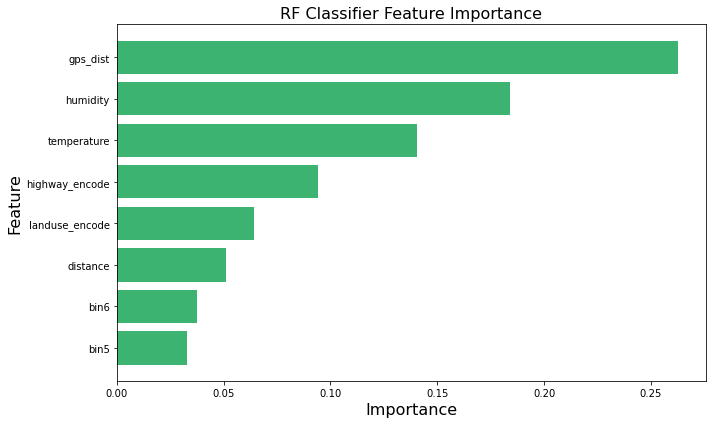

In [32]:
fig, ax = plt.subplots(figsize = (10,6))
top5 = out[:8][::-1]
plt.barh(top5['Feature'], top5['Importance'], color = '#3CB371')
plt.xlabel('Importance',fontsize = 16)
plt.ylabel('Feature',fontsize = 16)
plt.title('RF Classifier Feature Importance', fontsize = 16)
plt.tight_layout()
#plt.savefig(path.join(graph_path, 'rf_importance2.pdf'))

In [33]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
# Random Forest Classifier Hyperparam search

from sklearn.model_selection import RandomizedSearchCV

#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
#max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
#min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
#bootstrap = [True, False]

random_grid = {#'n_estimators': n_estimators,
               #'max_features': max_features,
               #'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
                }

clf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=0, n_jobs = -1)

rf_random.fit(X_all_train, y_all_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=1,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4]},
                   random_state=0, verbose=2)

In [35]:
best_estimator = rf_random.best_estimator_
rf_random.best_params_

{'min_samples_leaf': 4}

In [36]:
best_estimator.score(X_all_test, y_all_test)

0.9986571172784243

0.9986577999047157

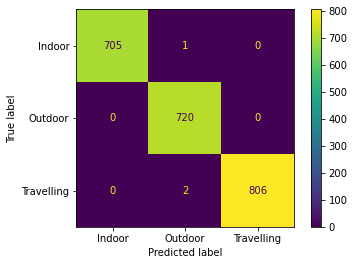

In [37]:
y_all_preds = best_estimator.predict(X_all_test)
plot_confusion_matrix(best_estimator, X_all_test, y_all_test, display_labels=['Indoor', 'Outdoor','Travelling'])
f1_score(y_all_test, y_all_preds, average='weighted')

## F1 Score Change Graph

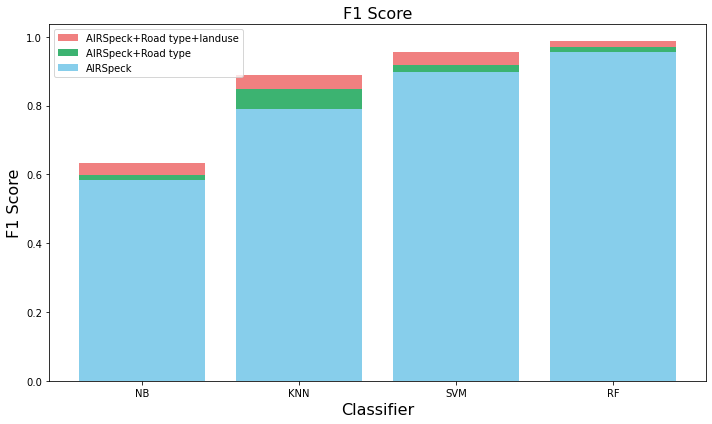

In [38]:
df = pd.DataFrame({'air': [0.583,0.790,0.899,0.955], 'road': [0.598,0.849,0.919,0.971], 'all': [0.634,0.889,0.955,0.987]}, 
             index=['NB','KNN','SVM','RF'])

df = df.sort_values(by='air')

fig, ax = plt.subplots(figsize=(10,6))
plt.title('F1 Score', fontsize=16)
plt.xlabel('Classifier', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)
ax.bar(df.index, df['all'], color = 'lightcoral', label='AIRSpeck+Road type+landuse')
ax.bar(df.index, df['road'], color = '#3CB371', label='AIRSpeck+Road type')
ax.bar(df.index, df['air'], color = 'skyblue', label='AIRSpeck')
ax.legend()
plt.tight_layout()
#plt.savefig(path.join(graph_path, 'feature_difference.jpg'))

## Visual evaluation of held out set

In [39]:
# Code from mapping notebook (could put this in a .py file)
from geopy import distance
import folium

def getCoords(df, timestamp=False):
    # return list of lists, each inside list contains the coordinate of one data point
    coords = df.filter(['gpsLatitude', 'gpsLongitude'])
    coords = list(coords.to_records(index=timestamp))
    return [list(c) for c in coords]

def getMap(coords, df, transport=False, classification=False, line=False):
    # draw the map, if classification=True, draw different class with different colors
    # Maps © www.thunderforest.com, Data © www.osm.org/copyright
    m = folium.Map(location=coords[0], zoom_start=12)
    if transport:
        m = folium.Map(location=coords[0], zoom_start=12, tiles = 'https://tile.thunderforest.com/transport/{z}/{x}/{y}.png?apikey=79284124c2f24955b9cd0d84c306bd0d', attr= "Transport")
    cs = []
    colour = 'red'
    for i,c in enumerate(coords):
        if classification==True:
            io = df.iloc[i]['pred_label']
            if io == 0:
                # Indoor
                colour = 'crimson'
            elif io == 1:
                # Outdoor
                colour = 'green'
            elif io == 2:
                # Commuting
                colour = 'darkblue'
            
        coord = c
        cs.append(coord)
        
        label = "Coords: {0}".format(c)
        if classification== True:
            label += "\n Classification: {0}".format(io)
        
        folium.Circle(
            radius=10,
            location=coord,
            popup=label,
            color=colour,
            fill=True,
        ).add_to(m)
    
    if line==True:
        folium.PolyLine(cs).add_to(m)
    return m

def getDistTwoPoints(coords1, coords2):
    # Returns approximate estimate of meters between 2 gps coords
    return distance.distance(coords1, coords2).km * 1000

def getTimeDiffTwoPoints(time1, time2):
    return pd.Timedelta(time2 - time1).seconds

def getDistList(coordList):
    distList = []
    for x in range(len(coordList)-1):
        distList.append(getDistTwoPoints(coordList[x], coordList[x+1]))
    return distList

def getDistAndTime(airspeck):
    # calculate the speed
    outList = []
    coordList = getCoords(airspeck, timestamp = True)
    for x in range(len(coordList)-1):
        t0, t1 = coordList[x][0], coordList[x+1][0]
        c0, c1 = coordList[x][1:3], coordList[x+1][1:3]
        dt = getTimeDiffTwoPoints(t0,t1)
        dist = getDistTwoPoints(c0,c1)
        instant_speed = dist/dt
        outList.append((coordList[x][0],instant_speed))
        
    return pd.DataFrame(outList, columns=["timestamp", "instant_speed"]).set_index("timestamp")

In [40]:
def view_missing_value(df):
    for column in list(df.columns):
        print("{}:  {} % missing values \n".format(column, ((len(df) - df[column].count()) / len(df))*100))

In [41]:
test = pd.read_csv(path.join(data_dir, "london_unseen_data_with_roads_distance_land.csv"))
test['highway'] = test['highway'].astype('category')
test['highway_encode'] = test['highway'].cat.codes
test['landuse'] = test['landuse'].astype('category')
test['landuse_encode'] = test['landuse'].cat.codes
#test.dropna(axis=0, inplace=True)
test_x = test[chosen_columns_all]

In [42]:
test_preds = best_estimator.predict(test_x)
test['i/o'] = test_preds

In [43]:
for i in range(800,1000):
    test.loc[i, 'label'] = 2

In [44]:
np.unique(test['label'], return_counts=True)

(array([0, 2]), array([669, 697]))

In [46]:
np.unique(test['i/o'],return_counts=True)
# We get an interesting situation where everything is considered outside. I think this is because of the temperature and humidity being particularly high

(array([0, 1, 2]), array([461, 414, 491]))

In [275]:
np.unique(test['label'],return_counts=True)

(array([0, 2]), array([669, 697]))

0.547580667899929

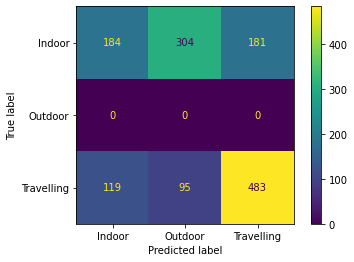

In [276]:
plot_confusion_matrix(best_estimator, test_x, test['label'], display_labels=['Indoor', 'Outdoor','Travelling'])
f1_score(test['label'], test['i/o'], average='weighted')